## Haberman's Survival Data Set
#### Survival of patients who had undergone surgery for breast cancer
 The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


#### Attribute Information:

**Feature-1** : Age of patient at time of operation 

**Feature-2** : Patient's year of operation (year - 1900)

**Feature-3** : Number of positive axillary nodes detected 

**Feature-4** : Survival status

                (class attribute) 1 = the patient survived 5 years or longer 
                
                (class attribute) 2 = the patient died within 5 year
                
As Feature-4 is a class variable , it is the result of all other three features , 
it can also be thought of as a Dependent feature and Feature-1,2,3 are independent features 

**OBJECTIVE** : If a new observation is to be tested then to classify whether it should be classified as class 1 or class 2
                based on it's features

In [1]:
#import the libraries needed for visualization and numeric computations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#To display the plots on to the jupyter notebook without calling the plt.show() function
%matplotlib inline 

In [3]:
#import the dataset and understand what are the features present in it
df= pd.read_csv("Habermans_Survival_Data_Set.csv")

In [4]:
df

,age,year_of_operation,axillary_nodes,survival_class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


## Pair Plots

In [5]:
#let's examine the survival class to examine whether the data is balanced or imbalanced 
df['survival_class'].value_counts()

1    225
2     81
Name: survival_class, dtype: int64

We can see is not a balanced dataset although the proportion is not as bad as in other cases (36%)

In [6]:
sns.set_style("dark") #to display darkgrid as a background (can also be whitegrid , white , grid)

/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


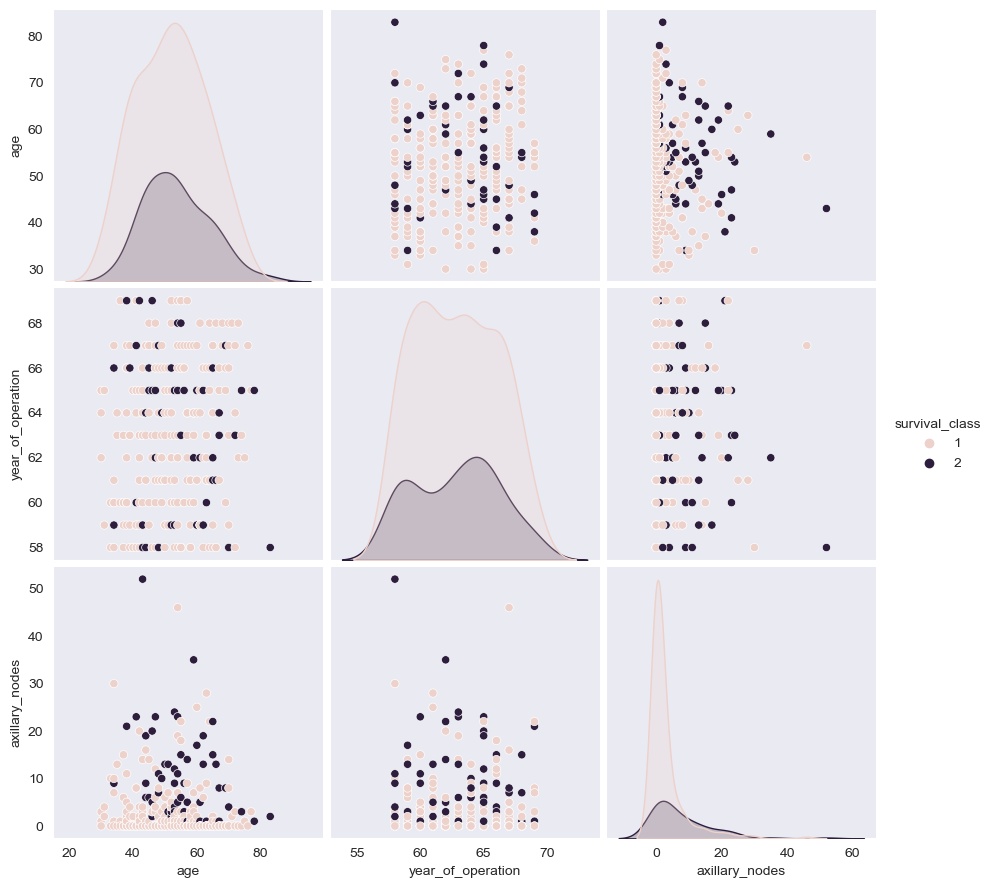

In [7]:
sns.pairplot(df,hue='survival_class',kind='scatter',size=3) 

In [8]:
df['survival_class'] = df['survival_class'].apply(lambda x: 'survived >= 5yrs' if x == 1 else 'survived < 5yrs')

In [9]:
df['survival_class'].value_counts()

survived >= 5yrs    225
survived < 5yrs      81
Name: survival_class, dtype: int64

/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


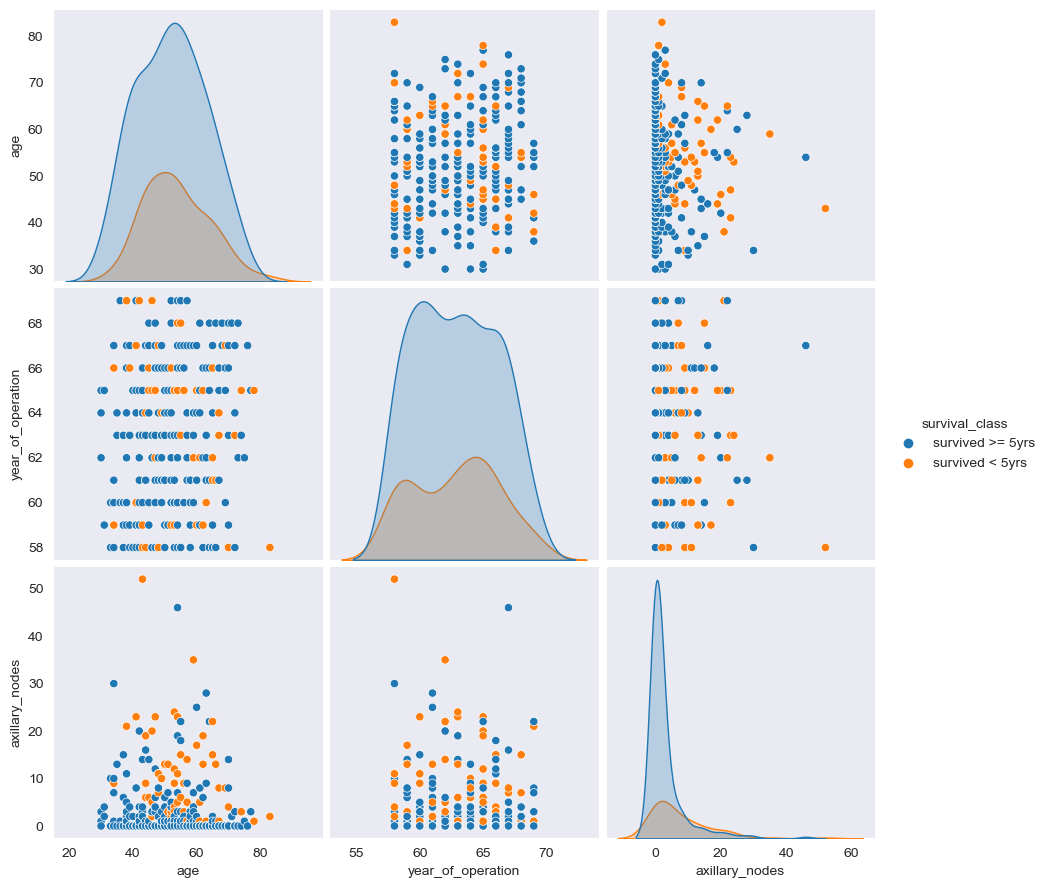

In [10]:
sns.pairplot(df,hue='survival_class',kind='scatter',size=3)

At first sight, seems impossible to classify observations, in every plot points are not separated in any manner

## Univariate Analysis
Performing analysis on each individual feature to identiy which feature might the suitable for our objective

In [11]:
df_class_1 = df[df['survival_class'] == 'survived >= 5yrs']
df_class_2 = df[df['survival_class'] == 'survived < 5yrs']

/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram with PDF for 'age' feature")

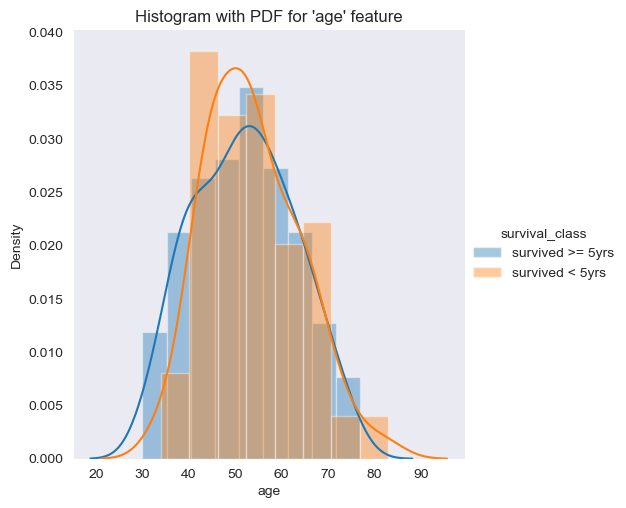

In [15]:
#initially plotting the first feature (age)

sns.FacetGrid(df,hue='survival_class',height=5).map(sns.distplot,'age').add_legend()
plt.title("Histogram with PDF for 'age' feature")

/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram with PDF for 'year_of_operation' feature ")

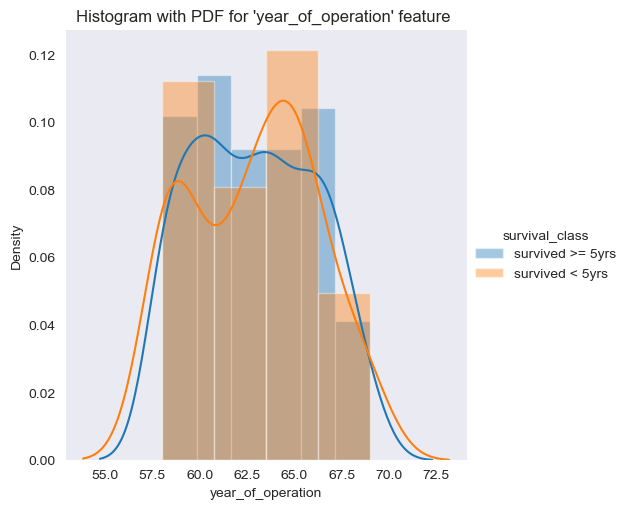

In [18]:
sns.FacetGrid(df,hue='survival_class',size=5).map(sns.distplot,'year_of_operation').add_legend()
plt.title("Histogram with PDF for 'year_of_operation' feature ")

/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nil.radi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram with PDF for 'axillary_nodes' feature")

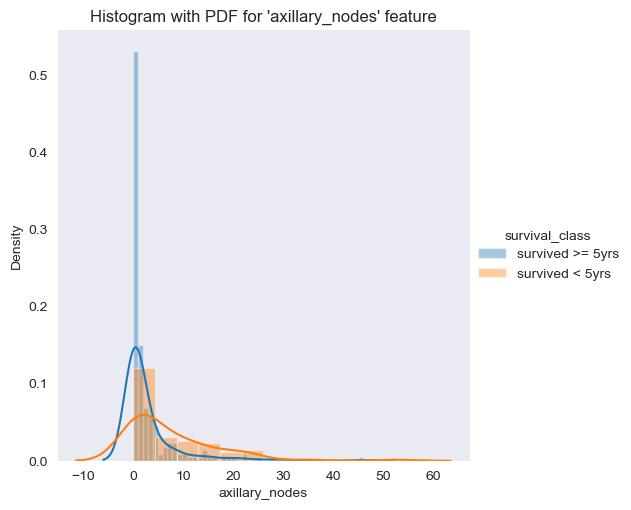

In [19]:
sns.FacetGrid(df,hue='survival_class',size=5).map(sns.distplot,'axillary_nodes').add_legend()
plt.title("Histogram with PDF for 'axillary_nodes' feature")

**Observation**:
    
1.In the histogram plots pf features 'year_of_operation' and 'age' , PDF of two plots show that , two classes ('survived>=5yrs' and 'survived<5yrs') overlapped (almost they are top on each other). So, we cannot consider both features as useful feature for our objective.


2.Whereas in the histogram plot for feature 'axillary_nodes' . Even though there is an slight overlap between two PDF of classes (survived>=5yrs and survived<5yrs) but there is possibility of classifying results based on this feature when compared to other two features. 

For indetailed analysis , we will plot CDF,boxplots and violin plots for feature 'axillary_nodes'

### Univariate Analysis on 'axillary_nodes' feature

#### Plotting CDF(Cumulative Distribution Function) for this feature . 

It is the cumsum of the PDFs'. It helps in determing the percentage of class is below or above at a given point.



In [21]:
count,bin_edges = np.histogram(df_class_1['axillary_nodes'],density=True,bins=10)
PDF = count/sum(count)
print(PDF)
print(bin_edges)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


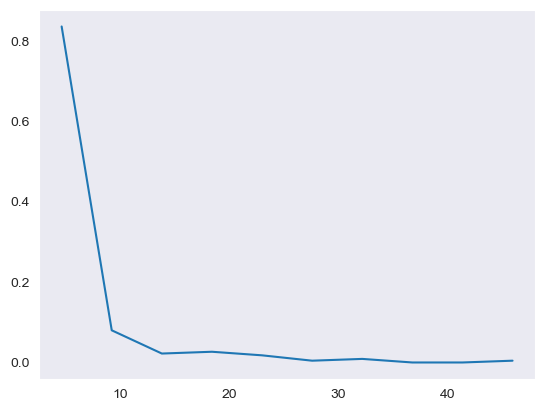

In [22]:
plt.plot(bin_edges[1:],PDF)

#computing CDF
CDF = np.cumsum(PDF)
print(CDF)

Text(0.5, 1.0, "PDF and CDF of 'axillary_nodes' feature for survival_class = 'survived>=5yrs' ")

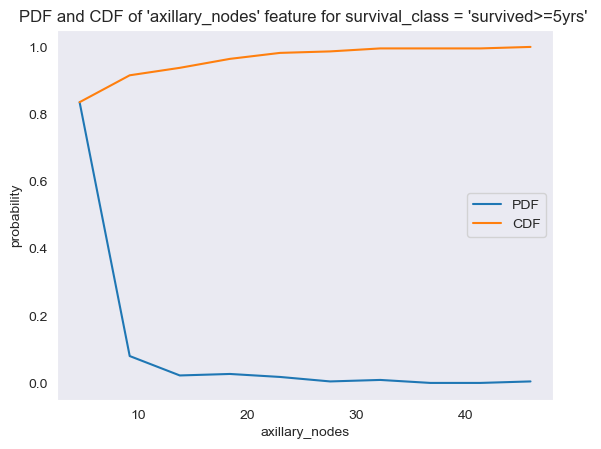

In [23]:
plt.plot(bin_edges[1:],PDF,label = "PDF",)
plt.plot(bin_edges[1:],CDF,label = "CDF")
plt.legend()
plt.xlabel("axillary_nodes")
plt.ylabel("probability")
plt.title("PDF and CDF of 'axillary_nodes' feature for survival_class = 'survived>=5yrs' ")

**Observation:**
    
  1. This is the plot of class-1(survived>=5yrs)
    
  2. From the given data we know that among 306 people,225 people have 'survived>=5yrs'.
    
  3. From the CDF in the graph we can say that approximately "90%" of the people who "survived greater than 5yrs" has "count of axillary nodes <=10"  
    
    i.e., approximately 202 people who has survived>=5yrs have 'count of axillary nodes less than or equal to 10'.
    

Text(0.5, 1.0, 'PDF and CDF of both survival_classes')

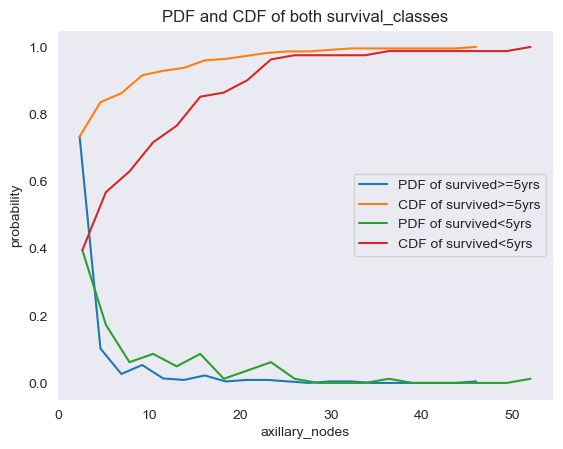

In [24]:
#### plot for two survival_classes

#plot for 'survived>=5yrs'
count,bin_edges = np.histogram(df_class_1['axillary_nodes'],bins=20,density=True)
PDF = count/sum(count)
#calculating CDF
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF,label="PDF of survived>=5yrs")
plt.plot(bin_edges[1:],CDF,label="CDF of survived>=5yrs")

#plot for 'survived<5yrs'
count,bin_edges = np.histogram(df_class_2['axillary_nodes'],bins=20,density=True)
PDF = count/sum(count)
#calculating CDF
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF,label="PDF of survived<5yrs")
plt.plot(bin_edges[1:],CDF,label="CDF of survived<5yrs")
plt.legend()
plt.xlabel("axillary_nodes")
plt.ylabel("probability")
plt.title("PDF and CDF of both survival_classes")

**Observation:**
    
1.**Our observation in above case has been ruled out ** as the CDF of "survived<5yrs" class show 70% of it's observations are for the patients who has (count of axillary_nodes less than equal to 10) . As we have stated our observation only by depending upon one class (survived>=5yrs)among two classes in the above observation.
    
2.In this plot, we can observe that there is an overlap between two PDFs'. 
    
3.Even though there is overlapping between both. when we fix our threshold value to '5'(count of no.of axillary nodes to 5), then if we need to classify the new patient according to this feature then we might predict him to class who can 'survive 5yrs or more than 5yrs' because from the CDF of 'survived<=5yrs' show that 80% of it's observation have 'count of axillary nodes' <= 5 whereas 'survived>5yrs' class has only 45% of observations at that value.

### Box Plot and Whiskers
Let's analyze this feature by using box-plot

<AxesSubplot:xlabel='survival_class', ylabel='axillary_nodes'>

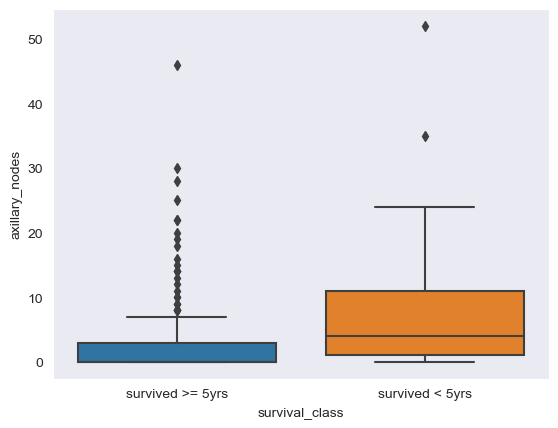

In [25]:
sns.boxplot(data = df,x="survival_class",y="axillary_nodes")

**Observation:**
   
1.From this plot, it is evident that the class 'survived>=5yrs' has 75percentile of count of axillary nodes value less than 5. probably less than 4.

2.The class 'survived<5yrs' has it's 50th percentile value more than the value of 75th percentile of 'survived>=5yrs' class.From the box plot of this class , it can be seen that most of it's values(count of axillary nodes) are '>6 and <12' (between 50th percentile and 75th percentile) of this class 

<AxesSubplot:xlabel='survival_class', ylabel='axillary_nodes'>

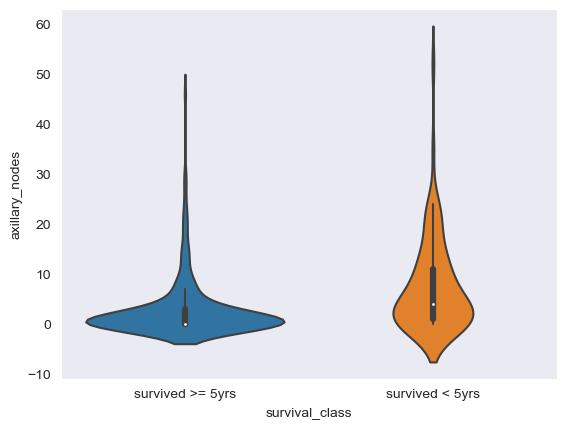

In [27]:
sns.violinplot(data = df,x='survival_class',y='axillary_nodes')

## Conclusion
1.Out of three features ('age','no.of.operations' and 'count of axillary_nodes') . 'axillary_nodes' is the best feature among three to classify the survival_class

2.Even though 'axillary_nodes' feature has some overlappings among survival_class. but based on above observations we can classify that if the 'count of axillary nodes' is less than 5 , then it can be classified as 'survived>=5yrs' else it is more likely to fall under 'survived<5yrs' class.